Training Examples:	50000
Validation Examples:	10000
Testing Examples:	10000
Number of parameters per example: 784

Example (0)


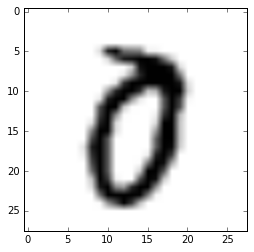

In [26]:
%matplotlib inline
import cPickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

# Load our sets
f = gzip.open("mnist.pkl.gz","r")
train_set, valid_set, test_set = cPickle.load(f)

# Shape of each set
print("Training Examples:\t" + str(train_set[1].shape[0]))
print("Validation Examples:\t" + str(valid_set[1].shape[0]))
print("Testing Examples:\t" + str(test_set[1].shape[0]))
print("Number of parameters per example: " + str(train_set[0].shape[1]) + "\n")

# We set X and y to only the first 5000 examples for the sake of computation time
X = train_set[0][:5000]
y = train_set[1][:5000]

# Validation sets are set to first 2000
X_val = valid_set[0][:2000]
y_val = valid_set[1][:2000]

# Testing set to 2000
X_test = test_set[0][:2000]
y_test = test_set[1][:2000]

# Visualization of example
ex_num = random.randint(0,train_set[1].shape[0]);
print("Example (" + str(train_set[1][ex_num]) + ")")
train_example_formatted = train_set[0][ex_num].reshape((28,-1))
plt.imshow(train_example_formatted, cmap=cm.binary)


In [27]:
# Sci kit learn simple SVC
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1)
clf.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
# Prediction accuracy

#predictions = clf.predict(test_set[0][:1000])
#p = [1 if predictions[i] == test_set[1][i] else 0 for i in range(1000)]
#print(np.mean(p))

# Equal built in function
print(clf.score(X_test, y_test))

0.874


In [30]:
# Random forest with cross validation
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

# Number of Estimators
n_estimators = [5,20,150]
min_samples_split = [2,4,8,15]
min_samples_leaf = [1,2,4,8]

# To keep track of best hyperparams
best_n_estimators = 5
best_min_samples_split = 2
best_min_samples_leaf = 1

# To keep track of best score
best_score = 0

In [31]:
# 3*4*4 = 48 total hyperparameters
for n_est in n_estimators:
    for min_ss in min_samples_split:
        for min_sl in min_samples_leaf:
            rfc = RandomForestClassifier(random_state=1,n_estimators=n_est,min_samples_split=min_ss,min_samples_leaf=min_sl)
            score = np.mean(cross_validation.cross_val_score(rfc, X_val, y_val, cv=3))
            if score > best_score:
                best_score = score
                best_n_estimators = n_est
                best_min_samples_split = min_ss
                best_min_samples_leaf = min_sl

            
print("Params:\nNumber of estimators:\t" + str(best_n_estimators) 
      + "\nMin Samples per Split:\t" + str(best_min_samples_split) 
      + "\nMin Samples per Leaf:\t" + str(best_min_samples_leaf) 
      + "\nBest Score on Validation Data: " + str(best_score))


Params:
Number of estimators:	150
Min Samples per Split:	8
Min Samples per Leaf:	1
Best Score on Validation Data: 0.915068304098


In [25]:
# Create classifier with our best params
rfc = RandomForestClassifier(random_state=1, n_estimators=best_n_estimators, min_samples_split=best_min_samples_split,
                            min_samples_leaf=best_min_samples_leaf)
rfc.fit(X,y)
print(rfc.score(X_test,y_test))

0.9105


In [ ]:
# Sklearn chaining pca and logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA()
logisticregression = LogisticRegression()
pipe=Pipeline(steps=[('pca',pca),('logisticregression',logisticregression)])